# Classification Tree

## Imports

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,ConfusionMatrixDisplay, confusion_matrix

## Load the Data

In [111]:
path = r"C:\Users\kdelfino\Documents\GitHub\Classification_tree\cancer.csv"

In [112]:
df = pd.read_csv(path)

## Exploratory Data Analysis

In [113]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [115]:
df.duplicated().sum()

0

- Dataset has no missing data / duplicates or inconsistency, Data is cleaned

## Splitting Feature matrix and Target Vector

In [116]:
# set target and features
target = 'diagnosis'
X = df.drop(columns=target)
y = df[target]

# Convert y to  numeric value
target_map = {"M":1, "B":0}
y = y.map(target_map)

#split dataset 
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

## Model instantiating and training 

### Function to instantiate model and get scores

In [117]:
def model_eval(model, X_train,X_test,y_train,y_test):
    #Instantiate and train model 
    model_map = {
        "dt_clf" : DecisionTreeClassifier,
        "bag_clf" : BaggingClassifier,
        "rf_clf" : RandomForestClassifier
    }
    model_clf = model_map[model](random_state=42)
    model_clf.fit(X_train,y_train)
    #Use model.score to return accurary scores for training and test splits
    print(f"{model} Training Accuracy: {round(model_clf.score(X_train,y_train),3)}")
    print(f"{model} Test Accuracy : {round(model_clf.score(X_test,y_test),3)}")
    cm= confusion_matrix(y_test.values, model_clf.predict(X_test))
    print(f"Accuracy {round((cm[0][0]+ cm[1][1])/(cm[0][0] + cm[0][1]+ cm[1][0]+ cm[1][1]),3)*100}%")
    return model_clf

In [118]:
# Get Decision Tree Classifier score
dt_clf_score = model_eval("dt_clf", X_train,X_test,y_train,y_test)

dt_clf Training Accuracy: 1.0
dt_clf Test Accuracy : 0.951
Accuracy 95.1%


In [119]:
# Get Bagging Classifier score
bag_clf_score = model_eval("bag_clf",X_train, X_test, y_train, y_test)

bag_clf Training Accuracy: 0.993
bag_clf Test Accuracy : 0.951
Accuracy 95.1%


In [120]:
# Get RandomForest Classifier score
rf_clf_score = model_eval("rf_clf", X_train , X_test , y_train, y_test)

rf_clf Training Accuracy: 1.0
rf_clf Test Accuracy : 0.972
Accuracy 97.2%


- Here we can see that RandomForestClassifier model has the best score in terms of accuracy
     - rf_clf Training Accuracy: 1.0
     - rf_clf Test Accuracy : 0.972

## Visualizing ConfusionMatrix

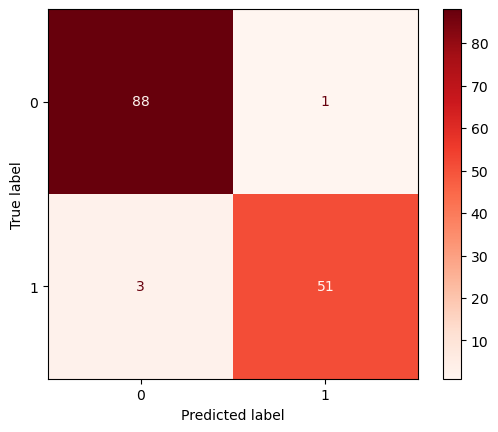

In [121]:
#plot the model confusion matrix
ConfusionMatrixDisplay.from_estimator(rf_clf_score,X_test,y_test, cmap='Reds');

In [123]:
# Model accuracy 
rf_clf_score = model_eval("rf_clf", X_train , X_test , y_train, y_test)

rf_clf Training Accuracy: 1.0
rf_clf Test Accuracy : 0.972
Accuracy 97.2%


- In this dataset the `Malignant` is the one set to `Positive`
- There were `1` prediction that were `False Positive`
- there were `3` predictions that were `False Negative`
- `False Negative` are worse than `False Positive` since they had the illness but weren't treated